In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


df = pd.read_csv("../input/ultimate-spotify-tracks-db/SpotifyFeatures.csv")

#removendo alguns gêneros menos relevantes ou que não possuem um tipo de som padrão
filtro = ['Movie',"""Children’s Music""","Children's Music",'World','Comedy','Indie','Soundtrack']
df = df[~df['genre'].isin(filtro)] 

#deletando colunas que serão irrelevantes para a análise a ser feita
#e também duplicatas (músicas com mais de um gênero)
df = df.drop_duplicates(subset=['track_id'],keep='first')
del df['artist_name']
del df['track_id']
del df['track_name']
del df['time_signature']

#mesclando gêneros semelhantes (necessário cuidado para não mesclar gêneros sonoricamente diferentes!)
df[['genre']] = df[['genre']].replace(['Rap'],['Hip-Hop'])
df[['genre']] = df[['genre']].replace(['Reggaeton'],['Reggae'])

#transformando os valores strings em floats
#https://www.kaggle.com/iqbalbasyar/spotify-genre-classification
df['mode'].replace({'Major':1,'Minor':0},inplace=True)
key_new = {'C':1, 'C#':2, 'D':3, 'D#':4, 'E':5, 'F':6, 'F#':7,
          'G':9, 'G#':10, 'A':11, 'A#':12, 'B':12}
df['key'] = df['key'].replace(key_new).astype(int)

df.sample(5)

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
67421,Hip-Hop,67,0.030300,0.856,145427,0.526,0.000000,2,0.1030,-6.510,1,0.3740,99.958,0.112
88953,Hip-Hop,52,0.000686,0.770,119084,0.633,0.000000,2,0.1580,-8.404,1,0.2790,139.939,0.534
5220,Alternative,50,0.037800,0.894,251381,0.569,0.000099,3,0.0636,-7.144,1,0.0406,110.005,0.827
176962,Jazz,39,0.416000,0.485,271000,0.432,0.006740,1,0.1970,-8.261,0,0.0324,74.769,0.214
131670,Reggae,44,0.250000,0.852,185882,0.812,0.000000,12,0.2060,-5.059,1,0.0964,101.973,0.834


A Capella      0.000884
Pop            0.021533
Rock           0.023175
Soul           0.035126
R&B            0.039925
Country        0.054892
Dance          0.059289
Ska            0.059593
Folk           0.059779
Jazz           0.060002
Opera          0.061502
Blues          0.063107
Classical      0.064704
Anime          0.066368
Hip-Hop        0.066516
Alternative    0.067556
Electronic     0.067957
Reggae         0.128093
Name: genre, dtype: float64


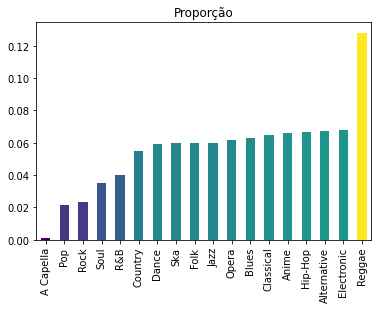

In [2]:
cmap=plt.get_cmap('viridis')
rescale= lambda pop: ( pop - np.min(pop) ) / ( np.max(pop) - np.min(pop) )

porcentagens =  df['genre'].value_counts()/len(df)
porcentagens = porcentagens.sort_values()
aeiou = df['genre'].value_counts()/len(df)
aeiou = aeiou.sort_values()
porcentagens.plot(title='Proporção',kind='bar',color=cmap(rescale(porcentagens)))
#aeiou.plot(title='proporção normal',kind='bar',color=cmap(rescale(aeiou)))
print(porcentagens)

<AxesSubplot:title={'center':'duration'}, xlabel='genre'>

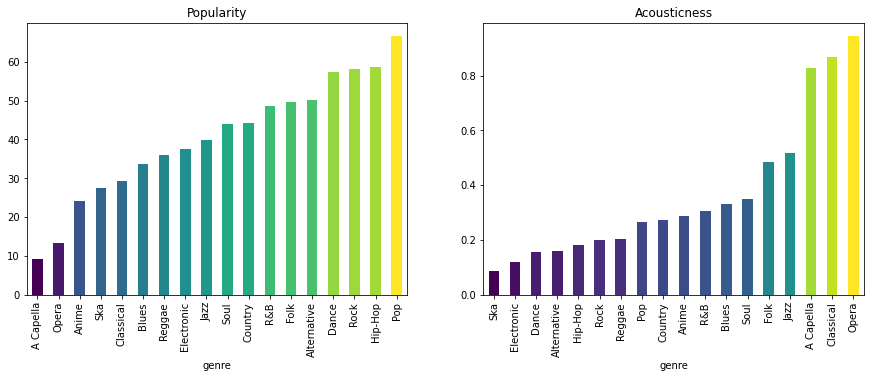

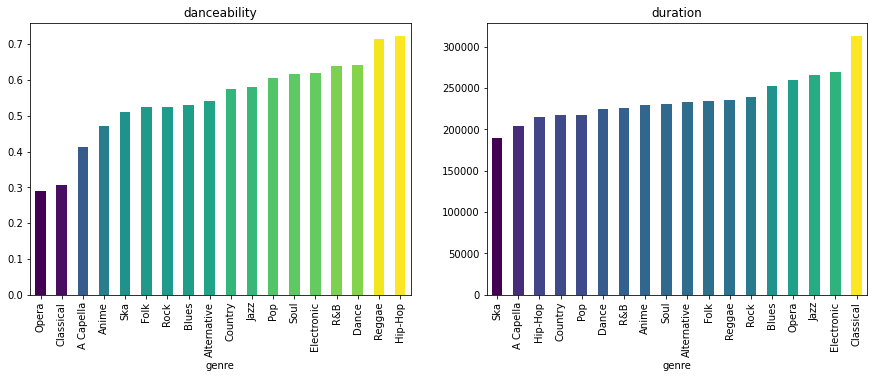

In [3]:
#fazendo gráfico para analisar os fatores de cada gênero musical
#fonte usar colormap: https://stackoverflow.com/questions/64068659/bar-chart-in-matplotlib-using-a-colormap
    
pop = df.groupby(['genre'])['popularity'].mean()
pop = pop.sort_values()
acoustic = df.groupby(['genre'])['acousticness'].mean()
acoustic = acoustic.sort_values()

dance = df.groupby(['genre'])['danceability'].mean()
dance = dance.sort_values()
duration = df.groupby(['genre'])['duration_ms'].mean()
duration = duration.sort_values()


#fig1,f1_axes = plt.subplots(ncols=2,nrows=2)
f= plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
pop.plot(title='Popularity',kind='bar',color=cmap(rescale(pop)))
plt.subplot(1,2,2)
acoustic.plot(title='Acousticness',kind='bar',color=cmap(rescale(acoustic)))

f= plt.figure(figsize=(15,11))
plt.subplot(2,2,3)
dance.plot(title='danceability',kind='bar',color=cmap(rescale(dance)))
plt.subplot(2,2,4)
duration.plot(title='duration',kind='bar',color=cmap(rescale(duration)))

<AxesSubplot:title={'center':'loudness'}, xlabel='genre'>

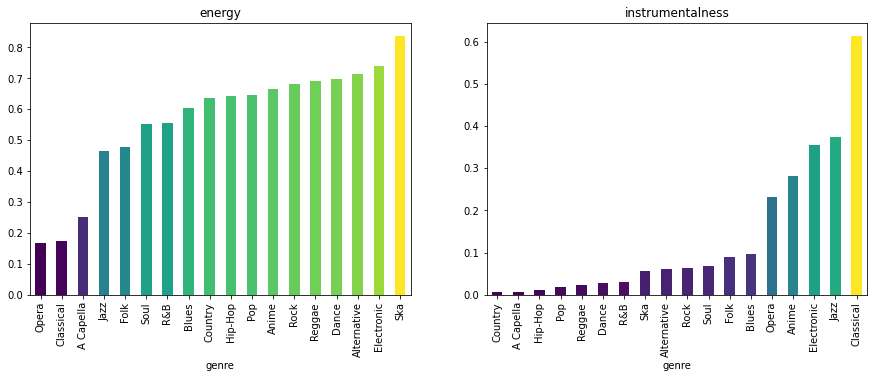

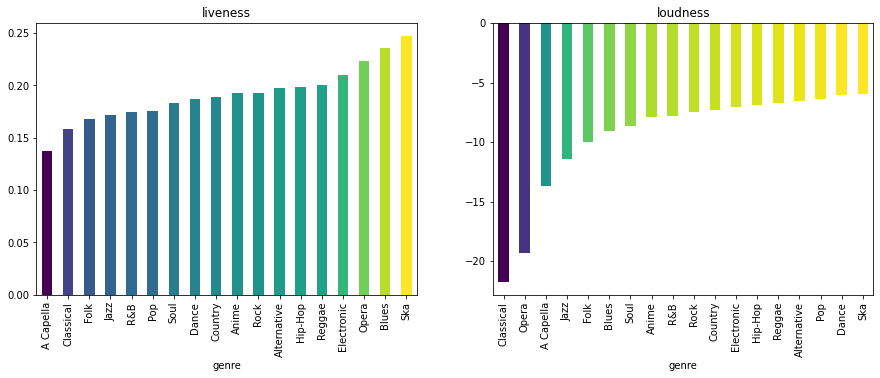

In [4]:
energy = df.groupby(['genre'])['energy'].mean()
energy = energy.sort_values()
instrumental = df.groupby(['genre'])['instrumentalness'].mean()
instrumental = instrumental.sort_values()

liveness = df.groupby('genre')['liveness'].mean()
liveness = liveness.sort_values()
loudness = df.groupby(['genre'])['loudness'].mean()
loudness = loudness.sort_values()

f= plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
energy.plot(title='energy',kind='bar',color=cmap(rescale(energy)))
plt.subplot(1,2,2)
instrumental.plot(title='instrumentalness',kind='bar',color=cmap(rescale(instrumental)))


f= plt.figure(figsize=(15,11))
plt.subplot(2,2,3)
liveness.plot(title='liveness',kind='bar',color=cmap(rescale(liveness)))
plt.subplot(2,2,4)
loudness.plot(title='loudness',kind='bar',color=cmap(rescale(loudness)))

<AxesSubplot:title={'center':'Mode'}, xlabel='genre'>

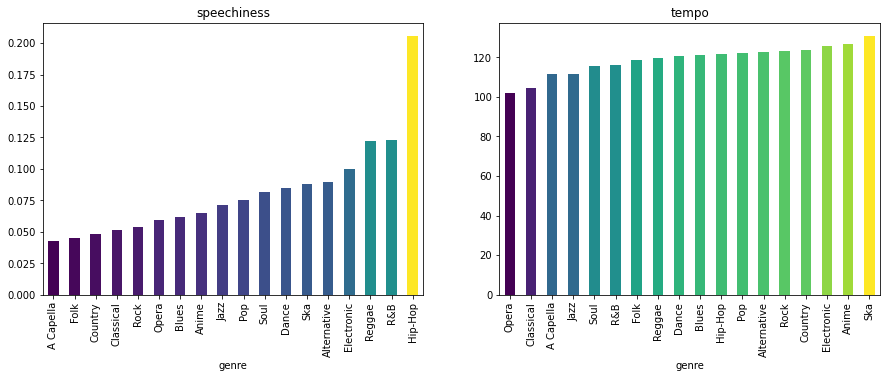

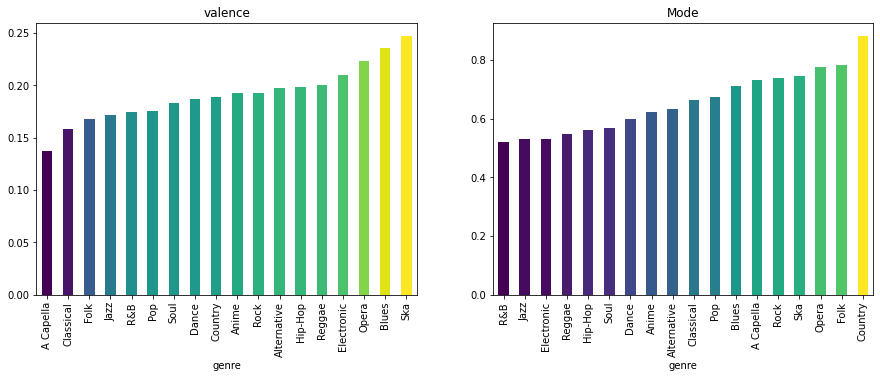

In [5]:
speechiness = df.groupby(['genre'])['speechiness'].mean()
speechiness = speechiness.sort_values()
tempo = df.groupby(['genre'])['tempo'].mean()
tempo = tempo.sort_values()

valence = df.groupby('genre')['valence'].mean()
valence = valence.sort_values()
key = df.groupby('genre')['key'].mean()
key = key.sort_values()
mode = df.groupby('genre')['mode'].mean()
mode = mode.sort_values()

f= plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
speechiness.plot(title='speechiness',kind='bar',color=cmap(rescale(speechiness)))
plt.subplot(1,2,2)
tempo.plot(title='tempo',kind='bar',color=cmap(rescale(tempo)))


f= plt.figure(figsize=(15,11))
plt.subplot(2,2,3)
liveness.plot(title='valence',kind='bar',color=cmap(rescale(valence)))
plt.subplot(2,2,4)
mode.plot(title='Mode',kind='bar',color=cmap(rescale(mode)))

In [6]:
t = len(df)
tamanho = int(0.0009*t)
treino = df.sample(tamanho)

tamanho = int(0.00028*t)
teste = df.sample(tamanho)
teste = teste[~teste.isin(treino)]
teste = teste[teste.genre.notnull()]
len(teste),len(treino)

(37, 121)

In [7]:
def d_euc(distancia,teste,pop,acoustic,dance,energy,instrumental,liveness,loudness,speechiness,tempo,valence,key,mode):
    for i in range(0,len(teste)-1):
        dist = math.sqrt( (teste.iloc[i][1]-pop)**2 + (teste.iloc[i][2]-acoustic)**2 + (teste.iloc[i][3]-dance)**2 +
                         (teste.iloc[i][5]-energy)**2 + (teste.iloc[i][6]-instrumental)**2 + (teste.iloc[i][8]-liveness)**2 +
                         (teste.iloc[i][9]-loudness)**2 + (teste.iloc[i][11]-speechiness)**2 + (teste.iloc[i][12]-tempo)**2 +
                         (teste.iloc[i][13]-valence)**2 +(teste.iloc[i][7]-key)**2 + (teste.iloc[i][10]-mode)**2)
        distancia.append(dist)

def d_mht(distancia,teste,pop,acoustic,dance,energy,instrumental,liveness,loudness,speechiness,tempo,valence,key,mode):
     for i in range(0,len(teste)-1):
        dist = (abs(teste.iloc[i][1]-pop) + abs(teste.iloc[i][2]-acoustic) + abs(teste.iloc[i][3]-dance) +
                abs(teste.iloc[i][5]-energy) + abs(teste.iloc[i][6]-instrumental) + abs(teste.iloc[i][8]-liveness) +
                abs(teste.iloc[i][9]-loudness) + abs(teste.iloc[i][11]-speechiness) + abs(teste.iloc[i][12]-tempo) +
                abs(teste.iloc[i][13]-valence) + abs(teste.iloc[i][7]-key) + abs(teste.iloc[i][10]-mode))
        distancia.append(dist)

In [8]:
#euclidiano
distancia = []
conterros = 0;
print("Calculando a distância Euclidiana... ")
print("numero de testes: ",len(teste))
for i in range(0,len(teste)):
    d_euc(distancia,treino,teste.iloc[i][1],teste.iloc[i][2],teste.iloc[i][3],teste.iloc[i][5],teste.iloc[i][6],
          teste.iloc[i][8],teste.iloc[i][9],teste.iloc[i][11],teste.iloc[i][12],teste.iloc[i][13],
          teste.iloc[i][7],teste.iloc[i][10])
    menor = min(distancia)
    menor_dist = distancia.index(menor)
    #print(menor,menor_dist)
    #print("Menor distancia: ",menor,"\nIndice do elemento com menor distancia: ",menor_dist)
    #print("Esse elemento é do genero: ",treino.iloc[menor_dist][0],"\n")
    #print("Menor distancia: ",menor)
    #print("Genero chute: ",treino.iloc[menor_dist][0])
    if(treino.iloc[menor_dist][0] != teste.iloc[i][0] ):
        #print("\ngenero certo: ",teste.iloc[i][0],"\n")
        conterros +=1
    #else:
        #print("\n")
    distancia = []
print(conterros,"erros de",len(teste),"igual a uma taxa de acerto de",100-(conterros*100)/len(teste),"%")

Calculando a distância Euclidiana... 
numero de testes:  37
29 erros de 37 igual a uma taxa de acerto de 21.621621621621628 %


In [9]:
#manhattan
distancia = []
conterros = 0;
print("Calculando a distância de Manhattan... ")
print("numero de testes: ",len(teste))
for i in range(0,len(teste)):
    d_mht(distancia,treino,teste.iloc[i][1],teste.iloc[i][2],teste.iloc[i][3],teste.iloc[i][5],teste.iloc[i][6],
          teste.iloc[i][8],teste.iloc[i][9],teste.iloc[i][11],teste.iloc[i][12],teste.iloc[i][13],
          teste.iloc[i][7],teste.iloc[i][10])
    menor = min(distancia)
    menor_dist = distancia.index(menor)
    #print(menor,menor_dist)
    #print("Menor distancia: ",menor,"\nIndice do elemento com menor distancia: ",menor_dist)
    #print("Esse elemento é do genero: ",treino.iloc[menor_dist][0],"\n")
    #print("Menor distancia: ",menor)
    #print("Genero chute: ",treino.iloc[menor_dist][0])
    if(treino.iloc[menor_dist][0] != teste.iloc[i][0] ):
        #print("\ngenero certo: ",teste.iloc[i][0],"\n")
        conterros +=1
    #else:
        #print("\n")
    distancia = []
print(conterros,"erros de",len(teste),"igual a uma taxa de acerto de",100-(conterros*100)/len(teste),"%")

Calculando a distância de Manhattan... 
numero de testes:  37
29 erros de 37 igual a uma taxa de acerto de 21.621621621621628 %


In [10]:
def hunt(teste):
#algoritmo de Hunt
    #i,1 = popularity;   i,2 = acousticness;       i,3 = danceability
    #i,4 = duration_ms;  i,5 = energy;             i,6 = instrumentalness; 
    #i,7 = key;          i,8 = liveness;           i,9 = loudness
    #i,10 = mode;        i,11 = speechiness;       i,12 = tempo
    #i,13 = valence
    conterros = 0
    
    for i in range(0,len(teste)): 
        if(teste.iloc[i,6]>0.1):
            #Classical, Eletronic, Blues, Jazz, Anime, Opera
            if(teste.iloc[i,9]<-10):     #Classical, Opera
                if(teste.iloc[i,1]<10):  #Opera
                    if(teste.iloc[i,0]!='Opera'):
                        conterros+=1
                    else:                #Classical
                        if(teste.iloc[i,0]!='Classical'):
                            conterros+=1
            else: #Eletronic, Blues, Jazz, Anime, Opera
                if(teste.iloc[i,10]<0.5): #Blues
                    if(teste.iloc[i,0]!='Blues'):
                            conterros+=1
                else: #Eletronic, Jazz, Anime
                    if(teste.iloc[i,5]<0.5): #Jazz
                        if(teste.iloc[i,0]!='Jazz'):  #Eletronic, Anime
                            conterros+=1
                    elif(teste.iloc[i,1]<28):   #Anime
                        if(teste.iloc[i,0]!='Anime'):
                            conterros+=1
                    else:  #Eletronic
                        if(teste.iloc[i,0]!='Eletronic'):
                            conterros+=1
        #Reggae,Country,A Capella, Hip-Hop, Pop, R&B, Dance, Ska, Alternative, Soul, Folk, Rock
        elif(teste.iloc[i,2]>0.4):  #A Capella, Folk, Soul
                if(teste.iloc[i,1]<10):
                    #A Capella
                    if(teste.iloc[i,0]!='A Capella'):
                            conterros+=1
                else: #Folk, Soul
                    if(teste.iloc[i,3]<0.7):
                        #Folk
                        if(teste.iloc[i,0]!='Folk'):
                            conterros+=1
                    else:  #Soul
                        if(teste.iloc[i,0]!='Soul'):
                            conterros+=1
        #Reggae,Country, Hip-Hop, Pop, R&B, Dance, Ska, Alternative, Rock
        elif (teste.iloc[i,11]>0.15):  #Hip-Hop, Reggae, R&B
            if(teste.iloc[i,1]>54):
                #Hip-Hop
                if(teste.iloc[i,0]!='Hip-Hop'):
                            conterros+=1
            elif(teste.iloc[i,13]>0.52):
                #Reggae
                if(teste.iloc[i,0]!='Reggae'):
                            conterros+=1
            else:
                #R&B
                if(teste.iloc[i,0]!='R&B'):
                            conterros+=1
        #Country, Pop, Dance, Ska, Alternative, Rock
        elif(teste.iloc[i,10]>10):  #Country, Ska, Rock
            if(teste.iloc[i,5]>72):
                #Ska
                if(teste.iloc[i,0]!='Ska'):
                            conterros+=1
            elif(teste.iloc[i,6]>0.03):
                #Rock
                if(teste.iloc[i,0]!='Rock'):
                            conterros+=1
            else:
                #Country
                if(teste.iloc[i,0]!='Country'):
                            conterros+=1
        #Pop, Dance,Alternative
        elif(teste.iloc[i,2]<2): #Dance, Alternative
            if(teste.iloc[i,6]>0.4): 
                #Alternative
                if(teste.iloc[i,0]!='Alternative'):
                            conterros+=1
                else:
                    #Dance
                    if(teste.iloc[i,0]!='Dance'):
                            conterros+=1
        else:
            #Pop
            if(teste.iloc[i,0]!='Pop'):
                            conterros+=1
                
                        

    print(conterros,"erros de",len(teste),"igual a uma taxa de acerto de",100-(conterros*100)/len(teste),"%")
        
hunt(teste)

10 erros de 37 igual a uma taxa de acerto de 72.97297297297297 %


In [11]:
df2 = df.sample(121)
df2.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
134799,Reggae,28,0.1780,0.733,301827,0.723,0.00000,12,0.0794,-5.221,1,0.0945,95.675,0.685
36560,Electronic,33,0.0593,0.655,245080,0.687,0.00337,1,0.3740,-7.761,1,0.0310,124.982,0.170
2140,Country,40,0.0073,0.684,205573,0.921,0.00000,1,0.1000,-4.296,1,0.0500,125.983,0.681
179932,Jazz,41,0.5010,0.783,208800,0.480,0.53400,9,0.1430,-6.910,1,0.2850,199.850,0.778
14816,Dance,71,0.1810,0.687,185440,0.444,0.00000,7,0.5330,-5.769,0,0.0554,61.970,0.407


In [12]:
#SVM
x = df2.drop(columns=['genre'])
y = df2['genre']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=13)

clf = svm.SVC(C=1,kernel='rbf')

clf.fit(x_train,y_train)
clf.predict(x_test)
clf.score(x_test,y_test)

0.1891891891891892